# This is the simpliest pipeline of Fian.

## There are 3 phases

- Intent Detection a.k.a NLP layers

- Feature Selection

- Respond

# Phase 1 - Intent Detection

1. Input Preprocessing

1. Extract user's intent (using TF-IDF + Logistic Regression)

First, for good measure, I will train the model first (train it once and give out a joblib file, but they are here for visualizations)

P.S: If you are seeing model and such, means that the part is under developement

Second, I will use the model to predict what's the user's intent


In [4]:
import spacy
nlp = spacy.load("en_curated_transformer")


OSError: [E050] Can't find model 'en_curated_transformer'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
import spacy
import spacy_transformers

print("spaCy loaded.")
print("Transformers module:", spacy_transformers)
nlp = spacy.load("en_core_web_trf")
print("Transformer model loaded successfully.")




spaCy loaded.
Transformers module: <module 'spacy_transformers' from 'd:\\Python\\python313\\Lib\\site-packages\\spacy_transformers\\__init__.py'>
Transformer model loaded successfully.


In [ ]:
# NLP SpaCy "en_core_web_trf"
import re
import spacy
import yfinance as yf
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_trf")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

## == == == -- -- -- Helper Functions -- -- -- == == == ##

def preprocess_query(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)


def run_NER(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

def extract_entities(entities, label):
    return [ent_text for ent_text, ent_label in entities if ent_label == label]

def to_yf_period(text):
    match = re.search(r'(\d+)\s*(year|years|month|months|week|weeks|day|days)', text, re.IGNORECASE)
    if match:
        number = match.group(1)
        unit = match.group(2).lower()

        if 'year' in unit:
            return f"{number}y"
        elif 'month' in unit:
            return f"{number}mo"
        elif 'week' in unit:
            days = int(number) * 7
            return f"{days}d"
        elif 'day' in unit:
            return f"{number}d"
    return None

def yfinance_search_company(company_names):
    results = {}
    for name in company_names:
        s = yf.Search(name, max_results=1)
        if s.quotes:
            results[name] = s.quotes[0].get("symbol")
        else:
            results[name] = None
    # Return a list of ticker symbols (filtering out any None values)
    return [ticker for ticker in results.values() if ticker]

## == == == -- -- -- Main Execute Functions -- -- -- == == == ##
def extract_tickers(text):
    entities = run_NER(text)
    company_names = extract_entities(entities, "ORG")
    tickers = yfinance_search_company(company_names)
    return tickers

def extract_intent(text):
    result = "show_infos"
    return result

def extract_period(text):
    entities = run_NER(text)
    date_entities = extract_entities(entities, "DATE")

    if len(date_entities) >= 2: 
        print("Multiple Date Ranges are not compatible YET. I will add later. Default: max") 
        return "max"

    if len(date_entities) == 1:
        period = to_yf_period(text)
        if period:
            return period
        else:
            return "max"  

    return "max"


raw_query = "What's the stock of Apple and Nvidia and Microsoft in the past 3 years?"

intent = extract_intent(raw_query)
period = extract_period(raw_query)
tickers = extract_tickers(raw_query)
indicators = [RSI, SMA_10] # This is only a placeholder. The actual way to extract will be implemented later.


print(intent) # Not implemented, Default: show_infos
print(period)
print(tickers)





show_infos
3y
['AAPL', 'NVDA', 'MSFT']


Fetching data for AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


=== First 10 rows ===
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-06-07  146.361847  146.647261  141.824639  142.070692   67808200
2022-06-08  145.623734  147.503563  145.131628  146.233939   53950200
2022-06-09  140.387741  145.613895  140.279477  144.757637   69473000
2022-06-10  134.964722  138.537394  134.895820  138.064977   91437900
2022-06-13  129.797592  133.065161  129.364537  130.771950  122207100
2022-06-14  130.663696  131.775858  129.403909  131.027864   84784300
2022-06-15  133.291550  135.171394  130.073194  132.169551   91533000
2022-06-16  128.006378  130.299590  127.002480  129.994487  108123900
2022-06-17  129.482635  130.978639  127.760268  128.016173  134520300
2022-06-21  133.724609  134.895822  131.214886  131.313298   81000500


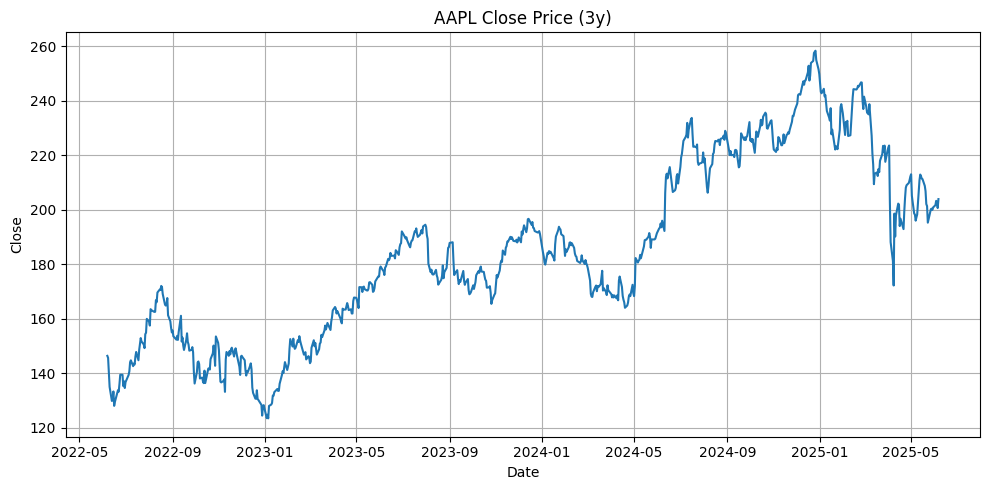

Fetching data for NVDA...


[*********************100%***********************]  1 of 1 completed

=== First 10 rows ===
Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2022-06-07  18.896057  18.969939  18.159224  18.442775  388914000
2022-06-08  18.622433  19.153703  18.509587  18.773225  363252000
2022-06-09  18.023254  18.907041  18.016264  18.455661  395574000
2022-06-10  16.950729  17.672738  16.845872  17.575871  465248000
2022-06-13  15.625548  16.289637  15.584604  15.978064  604153000
2022-06-14  15.814287  16.043971  15.390868  15.709431  469680000
2022-06-15  16.504343  16.844875  15.904166  16.072934  563936000
2022-06-16  15.579612  15.920145  15.379886  15.838257  545749000
2022-06-17  15.858229  15.973071  15.306985  15.626546  630334000
2022-06-21  16.543289  16.984683  16.384507  16.452414  483089000


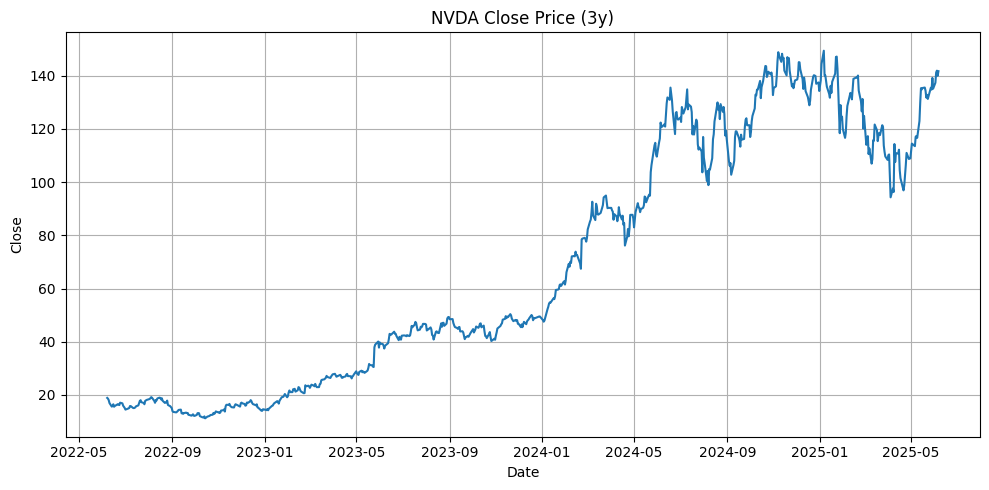

Fetching data for MSFT...


[*********************100%***********************]  1 of 1 completed

=== First 10 rows ===
Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2022-06-07  265.758728  266.373147  259.361016  260.043711  22860700
2022-06-08  263.720459  266.246383  262.940232  264.988287  17372300
2022-06-09  258.239532  265.963588  258.083487  261.155555  26439700
2022-06-10  246.731369  254.133584  246.282742  254.133584  31422800
2022-06-13  236.266830  242.859607  235.554894  239.046331  46135800
2022-06-14  238.441666  239.660742  235.535376  237.827246  28651500
2022-06-15  245.531799  248.984233  240.323907  242.167151  33111700
2022-06-16  238.909790  241.299178  237.008033  239.894799  33169200
2022-06-17  241.523499  244.303000  237.993057  238.646480  43084800
2022-06-21  247.462830  248.447838  243.337463  244.068909  29928300


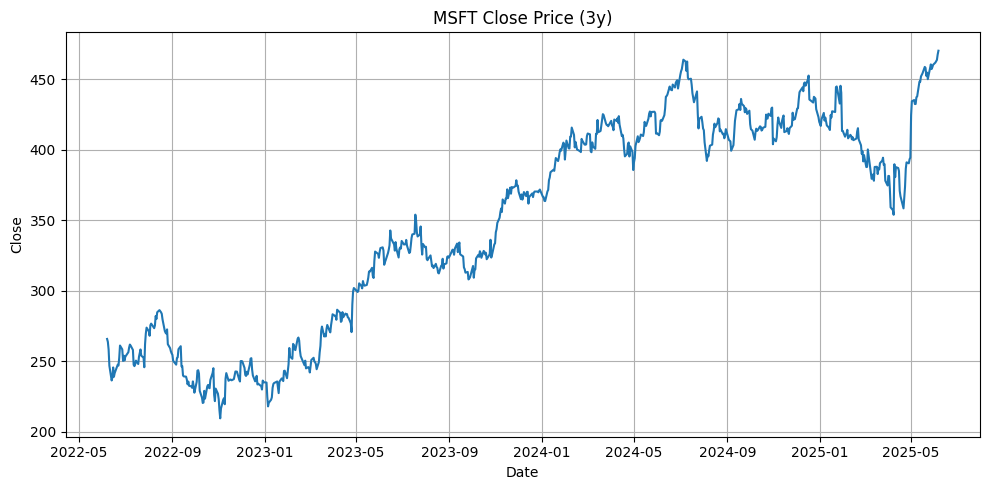

In [9]:
# show_infos function
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

## == == == -- -- -- Helper Functions -- -- -- == == == ##

def extract_data_yf(ticker, Period = "1y"):
    df = yf.download(ticker, period=Period, interval="1d")
    return df

def display_stock(df, n_rows: int = 10):

    print(f"=== First {n_rows} rows ===")
    print(df.head(n_rows).to_string())
    # print(f"\n=== Last {n_rows} rows ===")
    # print(df.tail(n_rows).to_string())
    # print("\n=== Descriptive Statistics ===")
    # print(df.describe().round(2).to_string())

def line_graph(df, field: str = "Close", title: str = None):

    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[field])
    plt.xlabel("Date")
    plt.ylabel(field)
    plt.title(title or f"{field} Price Over Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## == == == -- -- -- Main Execute Function -- -- -- == == == ##

def show_infos(ticker: str, period: str = "1y", visual: bool = True):

    # 1) Fetch the data
    df = extract_data_yf(ticker, period)

    # 2) Print a table summary
    display_stock(df)

    # 3) Plot if requested
    if visual:
        line_graph(df, title=f"{ticker.upper()} Close Price ({period})")

    return df



if intent == "show_infos":
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        df = show_infos(ticker, period)

## Feature Selection

Below, we start selecting what code to execute

In [37]:
from collections import OrderedDict
import ta

# Add SMA with different window sizes to indicator_funcs
for win in [5, 10, 20, 50, 100, 200]:
    indicator_funcs[f"SMA_{win}"] = lambda df, w=win: ta.trend.SMAIndicator(close=df["Close"], window=w).sma_indicator()
# Expanded indicator_funcs with 30 most used technical indicators from the 'ta' library

# Test each indicator in indicator_funcs and print out the total working
def test_indicators(df, indicator_funcs):
    working_count = 0
    total_count = len(indicator_funcs)
    print("Testing indicators:")
    for name, func in indicator_funcs.items():
        try:
            result = func(df.rename(columns={
                "Close_AAPL": "Close",
                "High_AAPL": "High",
                "Low_AAPL": "Low",
                "Open_AAPL": "Open",
                "Volume_AAPL": "Volume"
            }))
            if hasattr(result, 'shape'):
                print(f"  {name}: OK (shape={result.shape})")
            else:
                print(f"  {name}: OK")
            working_count += 1
        except Exception as e:
            print(f"  {name}: FAIL ({e})")
    print(f"\nTotal working: {working_count}/{total_count}\n")
    return working_count, total_count

# Flatten the nested indicator_funcs dictionary into a single-level OrderedDict
def flatten_indicator_funcs(indicator_funcs):
    flat = OrderedDict()
    for key, value in indicator_funcs.items():
        if isinstance(value, dict):
            for subkey, subval in value.items():
                flat[subkey] = subval
        else:
            flat[key] = value
    return flat

indicator_funcs = flatten_indicator_funcs(indicator_funcs)

def calculate_TI(df, indicators=None):
    # If the DataFrame has MultiIndex columns, flatten them for easier access
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join([str(i) for i in col if i]) for col in df.columns.values]

    # Ensure required columns exist for indicator calculations
    required_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
    # Try to find columns that match required names (case-insensitive, partial match)
    col_map = {}
    for col in required_cols:
        matches = [c for c in df.columns if col.lower() in c.lower()]
        if matches:
            col_map[col] = matches[0]
        else:
            raise ValueError(f"Required column '{col}' not found in DataFrame columns: {df.columns}")

    # Create a working DataFrame with standard column names for TA-Lib
    df_ta = df.rename(columns={v: k for k, v in col_map.items()})

    # Calculate indicators and add them to the original DataFrame
    if indicators is not None:
        for ind in indicators:
            if ind in indicator_funcs:
                try:
                    df[ind] = indicator_funcs[ind](df_ta)
                except Exception as e:
                    print(f"Could not calculate {ind}: {e}")

    return df

# Test: Calculate SMA50 and display the last 5 values
df_with_sma = calculate_TI(df.copy(), indicators=["SMA_10"])
print(df_with_sma[["Close_AAPL", "SMA_10"]].tail())


            Close_AAPL      SMA_10
Date                              
2025-06-02  201.699997  201.749001
2025-06-03  203.270004  201.198001
2025-06-04  202.820007  200.794002
2025-06-05  200.630005  200.648003
2025-06-06  203.919998  200.904002


Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed

=== First 10 rows ===
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-06-07  146.361862  146.647276  141.824654  142.070706   67808200
2022-06-08  145.623749  147.503579  145.131644  146.233954   53950200
2022-06-09  140.387711  145.613863  140.279447  144.757605   69473000
2022-06-10  134.964722  138.537394  134.895820  138.064977   91437900
2022-06-13  129.797607  133.065177  129.364553  130.771966  122207100
2022-06-14  130.663742  131.775904  129.403954  131.027910   84784300
2022-06-15  133.291595  135.171441  130.073239  132.169596   91533000
2022-06-16  128.006363  130.299574  127.002464  129.994472  108123900
2022-06-17  129.482697  130.978700  127.760329  128.016233  134520300
2022-06-21  133.724594  134.895806  131.214871  131.313283   81000500


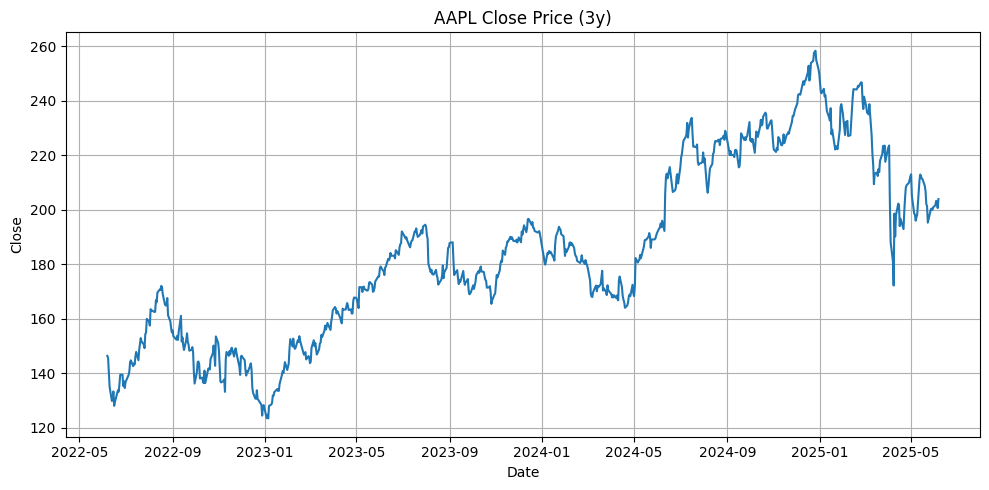

Fetching data for NVDA...


[*********************100%***********************]  1 of 1 completed

=== First 10 rows ===
Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2022-06-07  18.896059  18.969941  18.159226  18.442777  388914000
2022-06-08  18.622433  19.153703  18.509587  18.773225  363252000
2022-06-09  18.023258  18.907045  18.016268  18.455665  395574000
2022-06-10  16.950729  17.672738  16.845872  17.575871  465248000
2022-06-13  15.625546  16.289635  15.584602  15.978062  604153000
2022-06-14  15.814289  16.043973  15.390870  15.709433  469680000
2022-06-15  16.504345  16.844877  15.904168  16.072936  563936000
2022-06-16  15.579611  15.920144  15.379885  15.838256  545749000
2022-06-17  15.858229  15.973071  15.306985  15.626546  630334000
2022-06-21  16.543287  16.984681  16.384505  16.452412  483089000


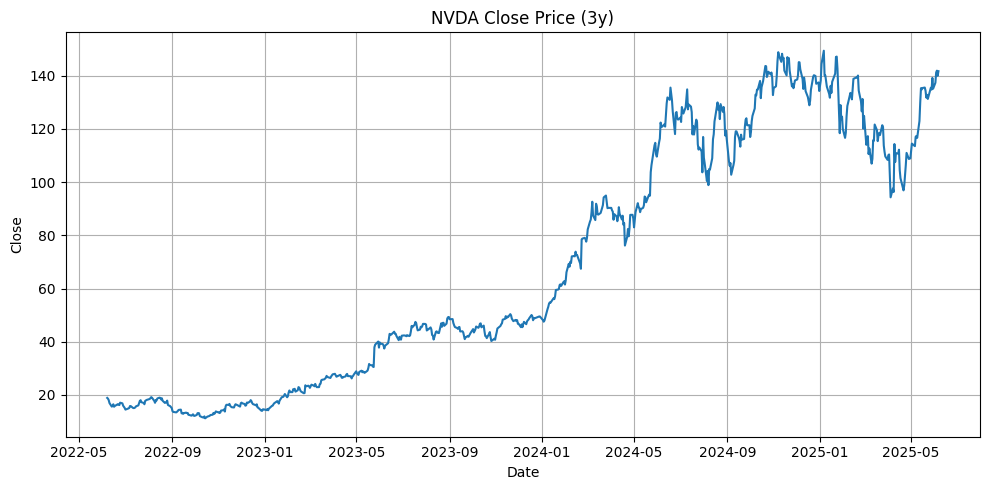

Fetching data for MSFT...


[*********************100%***********************]  1 of 1 completed

=== First 10 rows ===
Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2022-06-07  265.758728  266.373147  259.361016  260.043711  22860700
2022-06-08  263.720428  266.246352  262.940202  264.988256  17372300
2022-06-09  258.239471  265.963525  258.083426  261.155493  26439700
2022-06-10  246.731400  254.133615  246.282773  254.133615  31422800
2022-06-13  236.266800  242.859576  235.554863  239.046301  46135800
2022-06-14  238.441681  239.660758  235.535391  237.827261  28651500
2022-06-15  245.531830  248.984264  240.323937  242.167181  33111700
2022-06-16  238.909775  241.299162  237.008018  239.894783  33169200
2022-06-17  241.523468  244.302969  237.993027  238.646450  43084800
2022-06-21  247.462830  248.447838  243.337463  244.068909  29928300


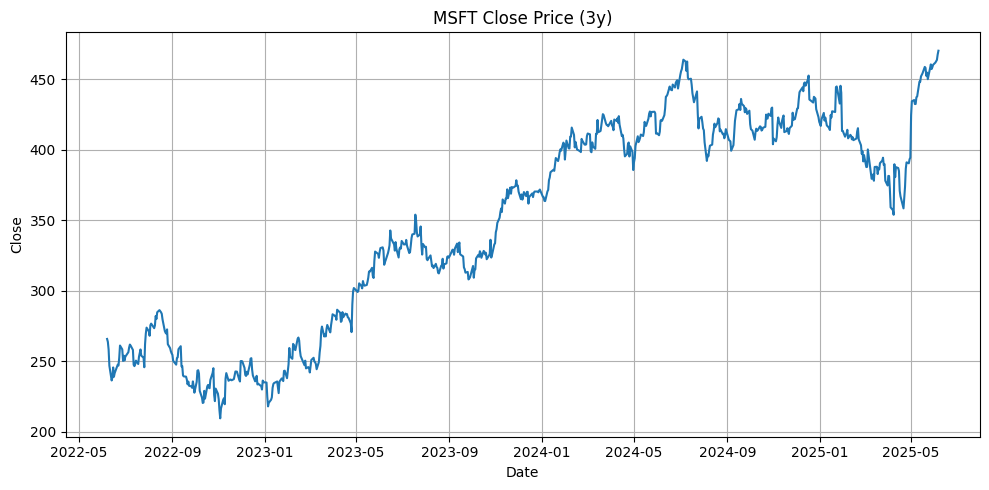

In [39]:
if intent == "show_infos":
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        df = show_infos(ticker, period)


if intent == "calculate_indicator":
    # Example: calculate only a few selected indicators for df
    selected_indicators = ["RSI", "SMA_10"]
    df_with_indicators = df.copy()
    for ind in selected_indicators:
        if ind in indicator_funcs:
            try:
                df_with_indicators[ind] = indicator_funcs[ind](df_with_indicators)
            except Exception as e:
                print(f"Could not calculate {ind}: {e}")
    print(df_with_indicators[[*df_with_indicators.columns[:5], *selected_indicators]].tail())
